In [1]:
import numpy as np
import scipy . optimize as opt
import math
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

# Parte 1

In [21]:
valores = read_csv (".\p2\ex2data1.csv", header=None).to_numpy() 
valores

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ],
       [45.08327748, 56.31637178,  0.        ],
       [61.10666454, 96.51142588,  1.        ],
       [75.02474557, 46.55401354,  1.        ],
       [76.0987867 , 87.42056972,  1.        ],
       [84.43281996, 43.53339331,  1.        ],
       [95.86155507, 38.22527806,  0.        ],
       [75.01365839, 30.60326323,  0.        ],
       [82.30705337, 76.4819633 ,  1.        ],
       [69.36458876, 97.71869196,  1.        ],
       [39.53833914, 76.03681085,  0.        ],
       [53.97105215, 89.20735014,  1.        ],
       [69.07014406, 52.74046973,  1.        ],
       [67.94685548, 46.67857411,  0.        ],
       [70.66150955, 92.92713789,  1.        ],
       [76.97878373, 47.57596365,  1.        ],
       [67.37202755, 42.83843832,  0.   

<Figure size 432x288 with 0 Axes>

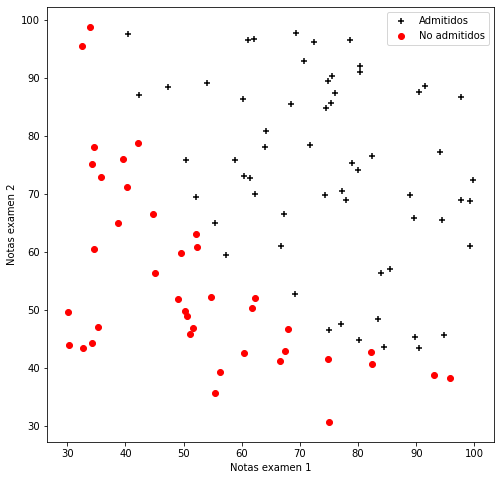

In [22]:
pos_si = np.where(valores[:,2]==1)
pos_no = np.where(valores[:,2]==0)
X = valores[:,:-1]
plt.figure()
fig= plt.figure(figsize=(8,8))
plt.scatter(X[pos_si,0], X[pos_si,1], marker='+',c = 'k', label = 'Admitidos')
plt.scatter(X[pos_no,0], X[pos_no,1], marker='o',c = 'r', label = 'No admitidos')
plt.xlabel("Notas examen 1")
plt.ylabel("Notas examen 2")
plt.legend(loc=1)
plt.savefig('plot.png')

In [31]:
len(pos_si[0])

60

In [9]:
def sigmoide(z):
    """
    Devuelve la función sigmoide dado un valor
    Parámetros:
    z    -- numero, array o matriz
    """
    return 1/(1+(math.e**(-z)))

In [24]:
def coste(thetas,X,Y):
    """
    Devuelve el valor de la función de coste para un caso de regresión multivariable
    Parámetros:
    thetas     -- valores de los parámetros de ajuste de la función
    X          -- valores de las variables
    Y          -- valores de las etiquetas
    """
    H = sigmoide(np.matmul(X, np.transpose(thetas)))
    cost = (- 1 / (len(X))) * np.sum(Y * np.log(H) + (1 - Y) * np.log(1 - H))
    #H = sigmoide(np.matmul(X, thetas))
    #cost = (- 1 / (len(X))) * (np.dot(Y, np.log(H)) + np.dot((1 - Y), np.log(1 - H)))
    return cost

def gradiente(thetas,X,Y):
    """
    Devuelve el valor de los parámetros de ajuste 
    Parámetros:
    thetas     -- valores de los parámetros de ajuste de la función
    X          -- valores de las variables
    Y          -- valores de las etiquetas
    """
    trans = np.transpose(X)
    matriz1 = sigmoide(np.matmul(X,thetas))
    valores_thetas = (np.matmul(trans,(matriz1-Y)))/len(Y)
    return valores_thetas

In [25]:
def pinta_frontera_recta(XX,Y,theta):
    plt.figure()
    pos_si = np.where(Y==1)
    pos_no = np.where(Y==0)
    Xs=XX[:,1:]
    fig= plt.figure(figsize=(8,8))
    plt.scatter(Xs[pos_si,0], Xs[pos_si,1], marker='+',c = 'k', label = 'Admitidos')
    plt.scatter(Xs[pos_no,0], Xs[pos_no,1], marker='o',c = 'r', label = 'No admitidos')
    x1_min, x1_max = Xs[:,0].min(), Xs[:,0].max()
    x2_min, x2_max = Xs[:,1].min(), Xs[:,1].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),np.linspace(x2_min, x2_max))
    h = sigmoide(np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()].dot(theta))
    h = h.reshape(xx1.shape)
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')
    plt.xlabel("Notas examen 1")
    plt.ylabel("Notas examen 2")
    plt.legend(loc=1)
    plt.savefig("frontera.png")    

In [30]:
X = valores[:,:-1]
X = np.hstack([np.ones([X.shape[0],1]),X])
Y = valores[:,-1]
thetas = np.zeros(len(np.transpose(X)))

In [27]:
valores_gradiente = gradiente(thetas,X,Y)

In [31]:
valores_gradiente

array([ -0.1       , -12.00921659, -11.26284221])

In [32]:
coste(thetas,X,Y)

0.6931471805599453

<ipython-input-23-5b5dc2ac02c3>:7: RuntimeWarning: overflow encountered in power
  return 1/(1+(math.e**(-z)))
<ipython-input-25-673e52bfe402>:14: UserWarning: No contour levels were found within the data range.
  plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')


<Figure size 432x288 with 0 Axes>

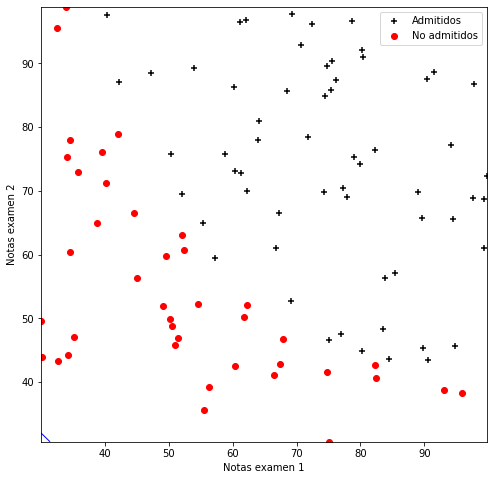

In [33]:
pinta_frontera_recta(X,Y,valores_gradiente)

In [34]:
result = opt.fmin_tnc(func=coste, x0=thetas, fprime=gradiente, args=(X, Y))
theta_opt = result[0]

In [35]:
theta_opt

array([-25.16131865,   0.20623159,   0.20147149])

In [36]:
coste(theta_opt,X,Y)

0.2034977015894745

<Figure size 432x288 with 0 Axes>

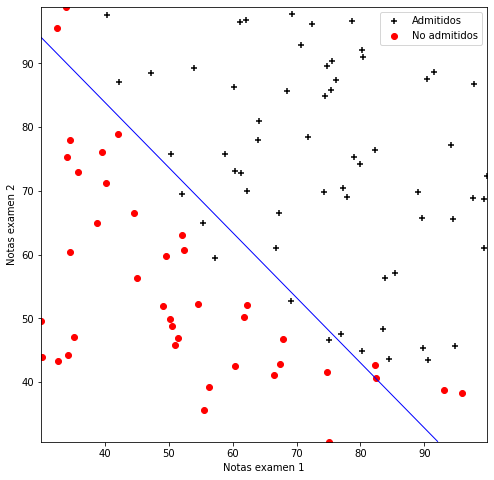

In [37]:
pinta_frontera_recta(X,Y,theta_opt)

In [10]:
def h(theta,X):
    """
    thetas     -- valores de los parámetros de ajuste de la función
    x          -- valores de las variables
    """
    return np.sum(sigmoide(np.dot(X,theta))>=0.5)*len(X)/100

In [41]:
h(theta_opt,X)

61.0

In [33]:
sum(Y)

60.0

# Parte 2

In [2]:
valores2 = read_csv (".\p2\ex2data2.csv", header=None).to_numpy() 
valores2

array([[ 0.051267 ,  0.69956  ,  1.       ],
       [-0.092742 ,  0.68494  ,  1.       ],
       [-0.21371  ,  0.69225  ,  1.       ],
       [-0.375    ,  0.50219  ,  1.       ],
       [-0.51325  ,  0.46564  ,  1.       ],
       [-0.52477  ,  0.2098   ,  1.       ],
       [-0.39804  ,  0.034357 ,  1.       ],
       [-0.30588  , -0.19225  ,  1.       ],
       [ 0.016705 , -0.40424  ,  1.       ],
       [ 0.13191  , -0.51389  ,  1.       ],
       [ 0.38537  , -0.56506  ,  1.       ],
       [ 0.52938  , -0.5212   ,  1.       ],
       [ 0.63882  , -0.24342  ,  1.       ],
       [ 0.73675  , -0.18494  ,  1.       ],
       [ 0.54666  ,  0.48757  ,  1.       ],
       [ 0.322    ,  0.5826   ,  1.       ],
       [ 0.16647  ,  0.53874  ,  1.       ],
       [-0.046659 ,  0.81652  ,  1.       ],
       [-0.17339  ,  0.69956  ,  1.       ],
       [-0.47869  ,  0.63377  ,  1.       ],
       [-0.60541  ,  0.59722  ,  1.       ],
       [-0.62846  ,  0.33406  ,  1.       ],
       [-0

<Figure size 432x288 with 0 Axes>

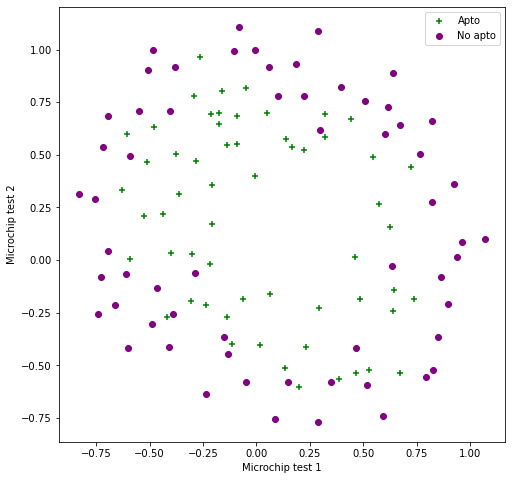

In [3]:
pos_si = np.where(valores2[:,2]==1)
pos_no = np.where(valores2[:,2]==0)
vars = valores2[:,:-1]
plt.figure()
fig= plt.figure(figsize=(8,8))
plt.scatter(vars[pos_si,0], vars[pos_si,1], marker='+',c = 'green', label = 'Apto')
plt.scatter(vars[pos_no,0], vars[pos_no,1], marker='o',c = 'purple', label = 'No apto')
plt.xlabel("Microchip test 1")
plt.ylabel("Microchip test 2")
plt.legend(loc=1)
plt.savefig('plot1.png')

In [4]:
poly = PolynomialFeatures(6)
poly

PolynomialFeatures(degree=6)

In [5]:
n_samples = np.size(valores2[:,:-1],0)
n_features = np.size(valores2[:,:-1],1)
XX2 = valores2[:,:-1]
mappedVariables = poly.fit_transform(XX2)
thetas2 = np.zeros(np.size(mappedVariables,1))

In [6]:
mappedVariables[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
def coste_regularizado(thetas,X,Y,lambda_valor):
    """
    Devuelve el valor de la función de coste para un caso de regresión multivariable
    Parámetros:
    thetas     -- valores de los parámetros de ajuste de la función
    X          -- valores de las variables
    Y          -- valores de las etiquetas
    """
    H = sigmoide(np.matmul(X, np.transpose(thetas)))
    sumatorio_reg = np.sum(thetas[1:]**2)
    coste = (- 1 / (len(X))) * np.sum(Y * np.log(H) + (1 - Y) * np.log(1 - H)) + (lambda_valor * sumatorio_reg/ 2*len(X))
    return coste
   
def gradiente_regularizado(thetas,X,Y,lambda_valor):
    """
    Devuelve el valor de los parámetros de ajuste 
    Parámetros:
    thetas     -- valores de los parámetros de ajuste de la función
    X          -- valores de las variables
    Y          -- valores de las etiquetas
    """
    trans = np.transpose(X)
    matriz1 = sigmoide(np.matmul(X,thetas))
    valores_thetas = (1 / len(X)) * (np.matmul(trans,(matriz1-Y)))
    valores_thetas_regularizados = np.concatenate([[valores_thetas[0]], valores_thetas[1:] * lambda_valor/len(X)])
    return valores_thetas

In [11]:
Y2 = valores2[:,-1]
valores_gradiente2 = gradiente_regularizado(thetas2,mappedVariables,Y2,1)

In [12]:
valores_gradiente2

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

In [13]:
coste_regularizado(thetas2,mappedVariables,Y2,1)

0.6931471805599454

In [14]:
result = opt.fmin_tnc(func=coste_regularizado, x0=thetas2, fprime=gradiente_regularizado, args=(mappedVariables, Y2, 1))
theta_opt = result[0]

In [15]:
coste_regularizado(theta_opt,mappedVariables,Y2,1)

0.693120819123078

In [17]:
def pinta_frontera_polinomio(X,Y,the,poly,lambda_valor,acierto,error):
    plt.figure()
    fig= plt.figure(figsize=(8,8))
    
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max() 
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max() 
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoide(poly.fit_transform(np.c_[xx1.ravel(), 
    xx2.ravel()]).dot(the)) 
    h = h.reshape(xx1.shape) 
    
    pos_si = np.where(Y==1)
    pos_no = np.where(Y==0)
    plt.scatter(X[pos_si,0], X[pos_si,1], marker='+',c = 'green', label = 'Apto')
    plt.scatter(X[pos_no,0], X[pos_no,1], marker='o',c = 'purple', label = 'No apto')
    plt.xlabel("Microchip test 1")
    plt.ylabel("Microchip test 2")
    plt.legend(loc=1)
    plt.title("Lambda = "+ str(lambda_valor))
    plt.text(-0.8,-0.8,"Aptos set original = "+str(sum(Y))+"\n"+"Porcentaje = "+ format(acierto,'.2f')+"\n"+"Tasa de error = "+ format(error,'.2f')+"\n",)
    
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='r') 
    plt.savefig("frontera_polinomial"+str(lambda_valor)+".png")

In [18]:
h(theta_opt,mappedVariables)

70.8

In [19]:
result2 = opt.fmin_tnc(func=coste_regularizado, x0=thetas2, fprime=gradiente_regularizado, args=(mappedVariables, Y2, 1000))
theta_opt2 = result2[0]

In [20]:
h(theta_opt2,mappedVariables)

70.8

In [40]:
theta_opt

array([ 1.96165395e-04,  1.41115678e-04,  2.39539915e-04, -3.72394067e-04,
       -2.02274754e-04, -2.34258944e-04,  6.96059135e-05, -8.31953073e-05,
       -8.72157272e-05,  5.59271245e-06, -2.50736865e-04, -2.38572187e-05,
       -1.29398192e-04, -6.12145459e-05, -1.82365728e-04,  1.08283922e-05,
       -4.58421732e-05, -1.97910579e-05, -5.81914708e-05, -6.09477297e-05,
       -3.14364853e-05, -1.52981395e-04,  9.82420049e-07, -6.34106070e-05,
       -4.85639834e-06, -6.62522601e-05, -2.66649080e-05, -1.13586853e-04])

In [34]:
sum(Y2)

58.0

In [113]:
theta_opt2

array([ 1.91567792e-07,  1.37808296e-07,  2.33925725e-07, -3.63666125e-07,
       -1.97533963e-07, -2.28768528e-07,  6.79745332e-08, -8.12454270e-08,
       -8.51716187e-08,  5.46163365e-09, -2.44860249e-07, -2.32980678e-08,
       -1.26365437e-07, -5.97798371e-08, -1.78091553e-07,  1.05746033e-08,
       -4.47677526e-08, -1.93272072e-08, -5.68276151e-08, -5.95192744e-08,
       -3.06996964e-08, -1.49395911e-07,  9.59394753e-10, -6.19244284e-08,
       -4.74257704e-09, -6.46994805e-08, -2.60399523e-08, -1.10924674e-07])

In [95]:
pruf = theta_opt*1000

<Figure size 432x288 with 0 Axes>

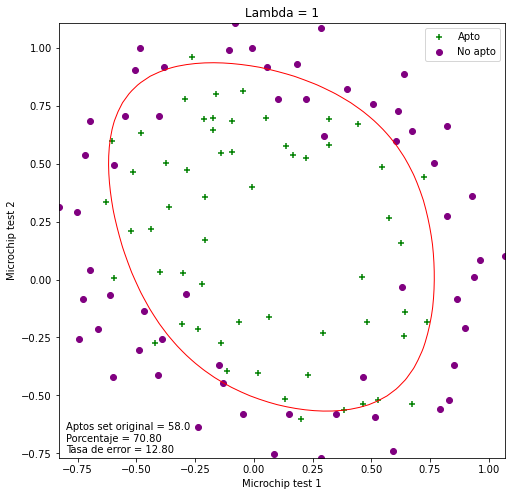

In [20]:
pinta_frontera_polinomio(XX2,Y2,theta_opt,poly,1,h(theta_opt,mappedVariables),abs(sum(Y2)-h(theta_opt,mappedVariables)))

<Figure size 432x288 with 0 Axes>

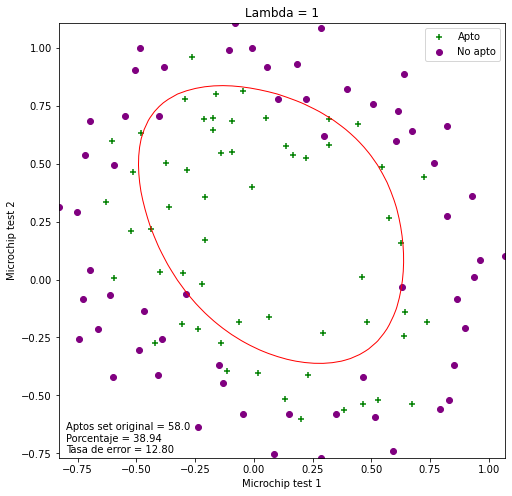

In [175]:
pinta_frontera_polinomio(XX2,Y2,thets,poly,1,h(thets,mappedVariables),abs(sum(Y2)-h(theta_opt,mappedVariables)))

In [16]:
def lambda_optimo(thetas,X,Y):
    thetas_optimas = thetas
    valor_lambda = 1
    mejor_error = 10**10
    for i in np.linspace(10, 60, num=9):
        thets = np.concatenate([[theta_opt[0]], (theta_opt[1:] * (i)/len(theta_opt))])
        coste_nuevo = coste_regularizado(thets,mappedVariables,Y,i)
        print("Coste = "+ str(coste_nuevo))
        acierto = h(thets,mappedVariables)
        error = abs(sum(Y)-acierto)
        if (error<mejor_error):
            mejor_error = error
            thetas_optimas = thets
            valor_lambda = i
        pinta_frontera_polinomio(X,Y,thets,poly,i,acierto,error)
    return thetas_optimas, valor_lambda

Coste = 0.6931661714327286
Coste = 0.6932782191612088
Coste = 0.6935348667868995
Coste = 0.6939917293196974
Coste = 0.6947044217695004
Coste = 0.695728559146205
Coste = 0.6971197564597085
Coste = 0.6989336287199083
Coste = 0.7012257909367012


<Figure size 432x288 with 0 Axes>

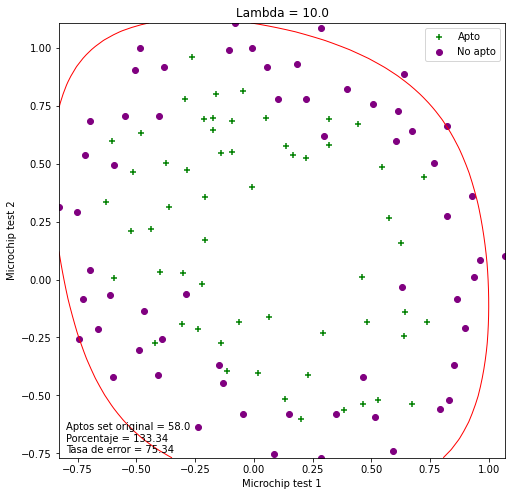

<Figure size 432x288 with 0 Axes>

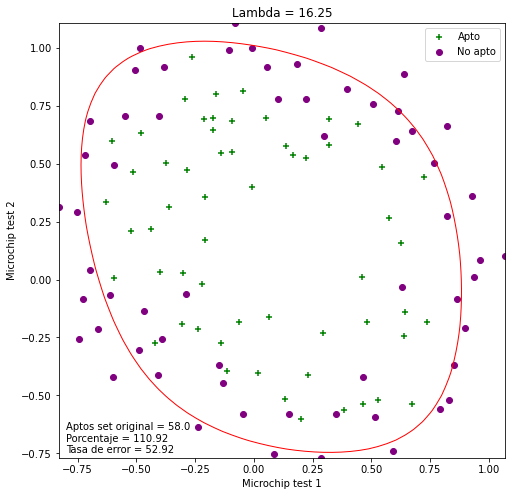

<Figure size 432x288 with 0 Axes>

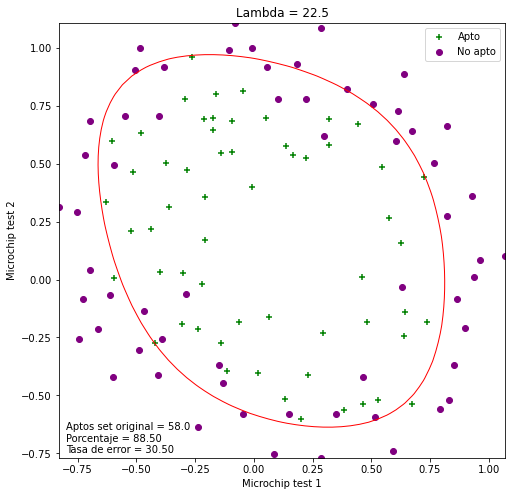

<Figure size 432x288 with 0 Axes>

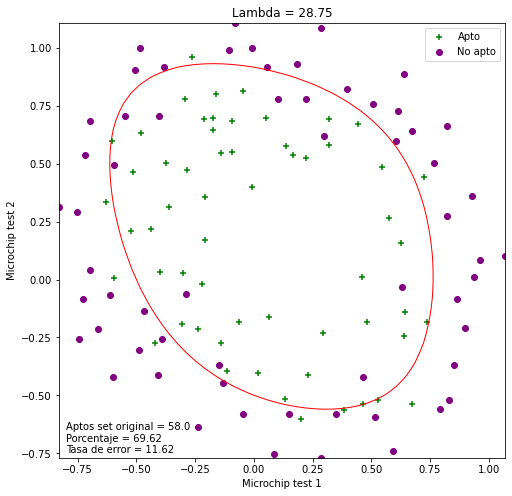

<Figure size 432x288 with 0 Axes>

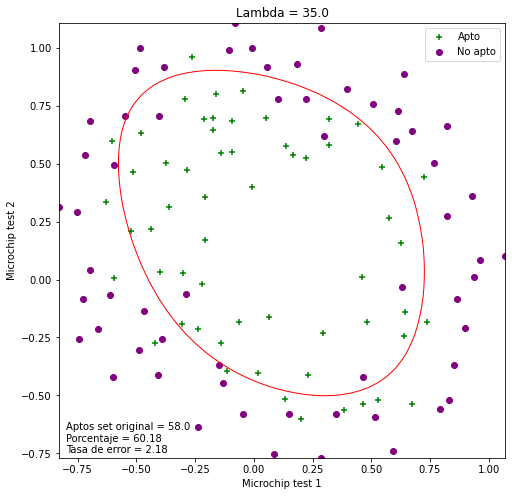

<Figure size 432x288 with 0 Axes>

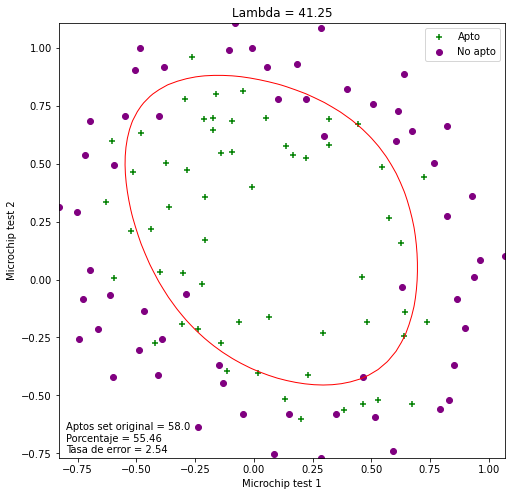

<Figure size 432x288 with 0 Axes>

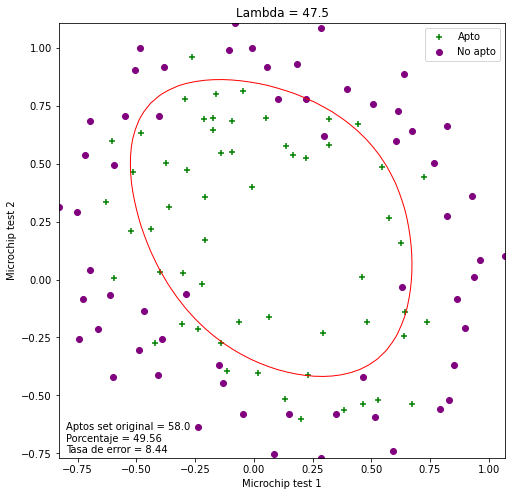

<Figure size 432x288 with 0 Axes>

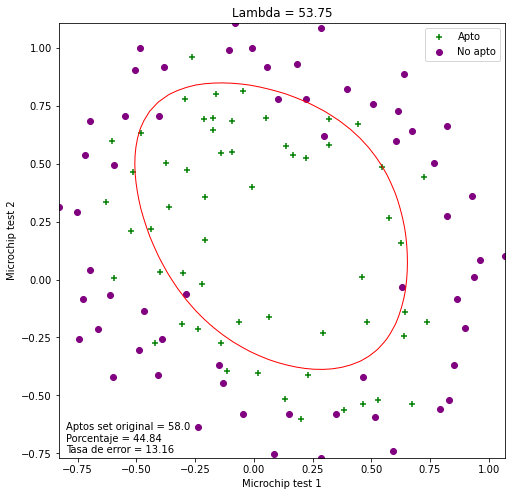

<Figure size 432x288 with 0 Axes>

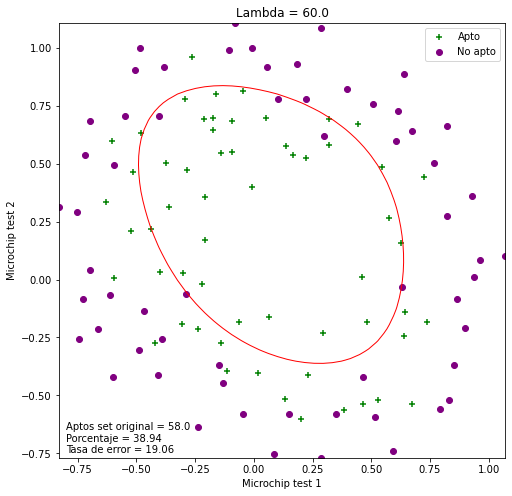

In [18]:
a,b = lambda_optimo(theta_opt,XX2,Y2)

In [19]:
a

array([ 1.96165395e-04,  1.76394598e-04,  2.99424893e-04, -4.65492584e-04,
       -2.52843443e-04, -2.92823680e-04,  8.70073918e-05, -1.03994134e-04,
       -1.09019659e-04,  6.99089057e-06, -3.13421081e-04, -2.98215233e-05,
       -1.61747740e-04, -7.65181824e-05, -2.27957160e-04,  1.35354903e-05,
       -5.73027164e-05, -2.47388223e-05, -7.27393385e-05, -7.61846621e-05,
       -3.92956066e-05, -1.91226744e-04,  1.22802506e-06, -7.92632588e-05,
       -6.07049793e-06, -8.28153251e-05, -3.33311350e-05, -1.41983566e-04])

In [20]:
b

35.0

In [ ]:
#print("Nº de aptos en el set original: " + str(sum(Y2)) + "\n")
for i in np.linspace(10, 60, num=9):
    #coste_viejo = coste_regularizado(theta_opt,mappedVariables,Y2,i)
    thets = np.concatenate([[theta_opt[0]], (theta_opt[1:] * (i)/len(theta_opt))])
    #print(thets)
    coste_nuevo = coste_regularizado(thets,mappedVariables,Y2,i)
    print("Coste = "+ str(coste_nuevo))
    #print(theta_opt)
    acierto = h(thets,mappedVariables)
    error = abs(sum(Y2)-acierto)
    pinta_frontera_polinomio(XX2,Y2,thets,poly,i,acierto)
    